## Fruit Classification using LogisticRegression

### Import required modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sn
sn.set(style='whitegrid')

 ### load the data file
The file contains the mass, height, and width of a selection of oranges, lemons and apples. The heights were measured along the core of the fruit. The widths were the widest width perpendicular to the height.

In [2]:
fruits = pd.read_csv('fruit_data_with_colors.csv')

In [3]:
fruits

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [4]:
#check missing values
fruits.isnull().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

In [5]:
# show only the first five rows
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [6]:
# the total number of samples is 59
fruits.shape

(59, 7)

In [7]:
# create a mapping from class/fruit label to fruit name
fruit_lable_to_name = dict(zip(fruits['fruit_label'].unique(), fruits['fruit_name'].unique()))   
fruit_lable_to_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

### Visualize the data using 3D scatter plot

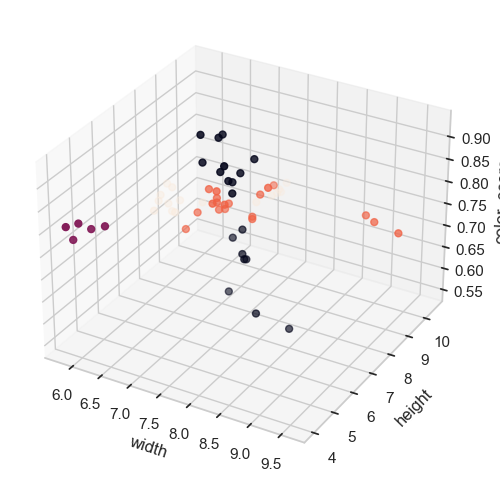

In [8]:
# plotting a 3D scatter plot
# https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
# https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.scatter.html
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(fruits['width'], fruits['height'], fruits['color_score'], c = fruits['fruit_label'], marker = '.', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

### Select three features: width, height, color_score

In [9]:
features = fruits.columns[-3:].tolist()
features

['width', 'height', 'color_score']

### Split the data into a Training data Set and a Testing data Set

In [10]:
X = fruits[features]
Y = fruits['fruit_label']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [11]:
X_train.head()

,width,height,color_score
30,7.1,7.5,0.79
41,7.6,8.2,0.79
33,7.5,8.1,0.74
42,7.2,7.2,0.82
48,7.3,10.1,0.72


In [12]:
X_train.shape

(47, 3)

In [13]:
Y_train.shape

(47,)

In [14]:
X_test

,width,height,color_score
26,9.6,9.2,0.74
35,7.1,7.9,0.75
43,7.2,10.3,0.70
28,6.7,7.1,0.72
11,7.1,7.6,0.92
2,7.4,7.2,0.60
34,7.6,7.8,0.75
46,7.3,10.2,0.71
40,7.1,7.5,0.78
22,7.3,7.1,0.87


In [15]:
X_test.shape

(12, 3)

In [16]:
Y_test.shape

(12,)

### Build a LogisticRegression Classifier

In [17]:
# instance of the classifier
LR = LogisticRegression(solver='newton-cg')

### Train the classifier using the training data (fit the model to the data)

In [18]:
LR.fit(X_train, Y_train)

LogisticRegression(solver='newton-cg')

### Use the trained KNN classifier to classify a sample in  the testing set

In [19]:
sample_test = X_test.iloc[0,:]
sample_test

width          9.60
height         9.20
color_score    0.74
Name: 26, dtype: float64

In [20]:
label_true = Y_test.iloc[0]
print('The true label is', label_true, ':', fruit_lable_to_name[label_true])

The true label is 3 : orange


In [21]:
label_predicted = LR.predict([sample_test])
print('The label predicted by LR is', label_predicted[0], ':', fruit_lable_to_name[label_predicted[0]])
if label_predicted[0] == label_true:
    print('Classification is accurate for this testing sample')
else:
    print('Classification is wrong for this testing sample')

The label predicted by LR is 3 : orange
Classification is accurate for this testing sample


C:\Programs\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### Use the trained LR Classifier to classify a sample that is not in the training set nor the testing set

In [22]:
sample_new = [6.0, 4.0, 0.8]
label_predicted = LR.predict([sample_new])
print('The label predicted by LR is', label_predicted[0], ':', fruit_lable_to_name[label_predicted[0]])

The label predicted by LR is 2 : mandarin


C:\Programs\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### Evaluate Performance of the LR Classifier on the Training Set and the Testing Set

In [23]:
LR.score(X_train, Y_train)

0.8297872340425532

In [24]:
LR.score(X_test, Y_test)

0.75

Here is another way to obtain accuracy

In [25]:
Y_train_pred = LR.predict(X_train)
accuracy_score(Y_train, Y_train_pred)

0.8297872340425532

In [26]:
Y_test_pred = LR.predict(X_test)
accuracy_score(Y_test, Y_test_pred)

0.75

<Axes: >

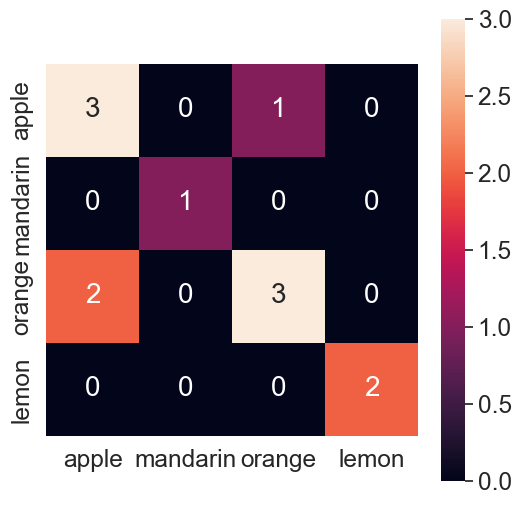

In [27]:
#import seaborn as sn
#sn.set(style='whitegrid')
cm = confusion_matrix(Y_test, Y_test_pred)
df_cm = pd.DataFrame(cm, index = ['apple', 'mandarin', 'orange', 'lemon'],
                     columns = ['apple', 'mandarin', 'orange', 'lemon'])
plt.figure(figsize = (6,6))
sn.set(font_scale=1.6)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 20}, square=True)